### About Dataset

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

DATA Source: IBM

https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees/data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split

In [2]:
file = 'drug200.csv'

In [3]:
df = pd.read_csv(file)

# Basic analysis

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# EDA

In [7]:
df['Age'].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

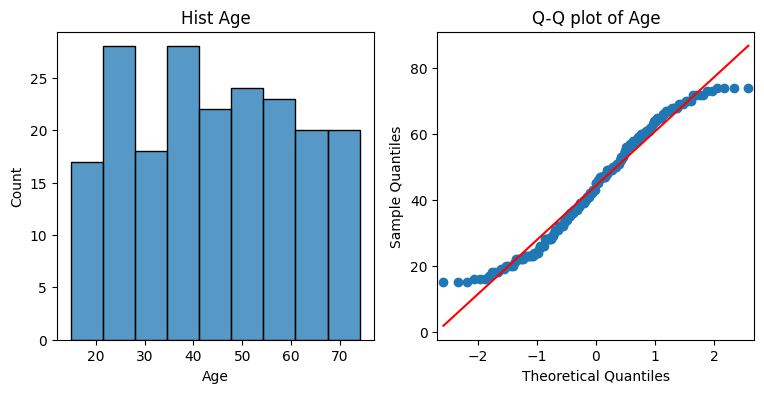

In [8]:
fig, ax = plt.subplots(1,2, figsize= (9,4))

sns.histplot(df['Age'], ax=ax[0])
ax[0].set_title('Hist Age')
sm.qqplot(df['Age'], line='s', ax=ax[1])
ax[1].set_title('Q-Q plot of Age')
plt.show()

In [9]:
df['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

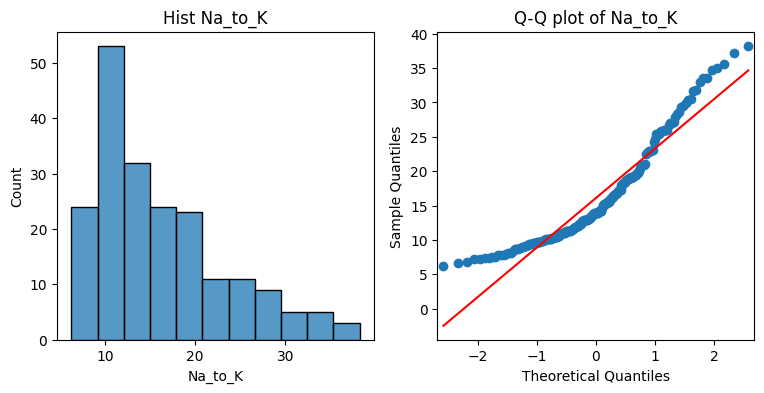

In [10]:
fig, ax = plt.subplots(1,2, figsize= (9,4))

sns.histplot(df['Na_to_K'], ax=ax[0])
ax[0].set_title('Hist Na_to_K')
sm.qqplot(df['Na_to_K'], line='s', ax=ax[1])
ax[1].set_title('Q-Q plot of Na_to_K')
plt.show()

In [11]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

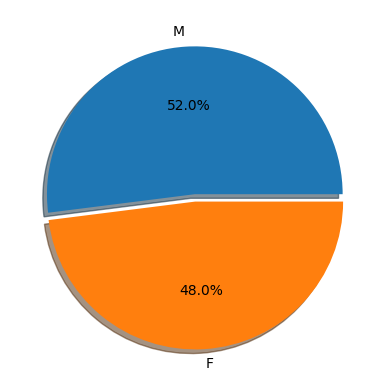

In [12]:
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct = '%1.1f%%', explode = (0,0.05), shadow= True )
plt.show()

In [13]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

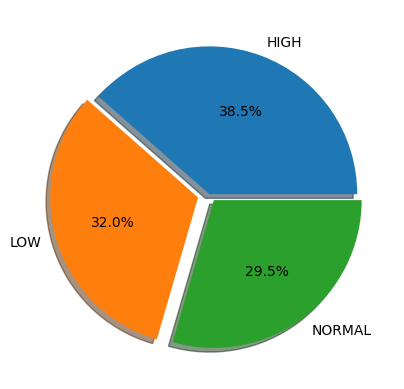

In [14]:
plt.pie(df['BP'].value_counts(), labels=df['BP'].value_counts().index, autopct = '%1.1f%%', explode = (0,0.08, 0.05), shadow= True )
plt.show()

In [15]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

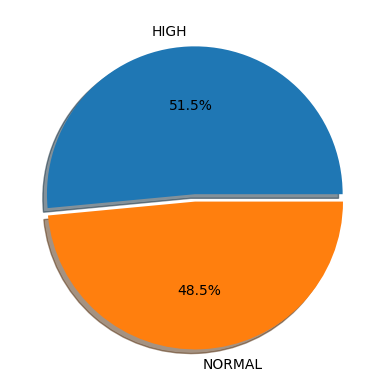

In [16]:
plt.pie(df['Cholesterol'].value_counts(), labels=df['Cholesterol'].value_counts().index, autopct = '%1.1f%%', explode = (0,0.05), shadow= True )
plt.show()

In [17]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

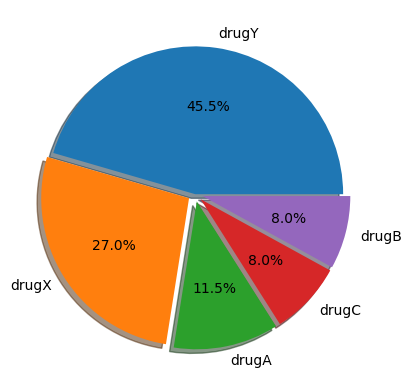

In [18]:
plt.pie(df['Drug'].value_counts(), labels=df['Drug'].value_counts().index, autopct = '%1.1f%%', explode = (0,0.05, 0.05, 0.05, 0.05), shadow= True )
plt.show()

# ML classification

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config

In [20]:
params = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [21]:
(params.shape, target.shape)

((200, 5), (200,))

In [22]:
numerical_columns = []
categorical_columns = []

for i in params.columns:
    if params[i].dtype == 'object' or params[i].dtype == 'category':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
print(f'Numerical columns: {numerical_columns}')
print(f'Categorical columns: {categorical_columns}')

Numerical columns: ['Age', 'Na_to_K']
Categorical columns: ['Sex', 'BP', 'Cholesterol']


In [23]:
target

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [24]:
cat_pipeline = Pipeline(steps = [
    ('Ordinal_encode', OrdinalEncoder())
])

In [25]:
target_le = pd.Series(LabelEncoder().fit_transform(target))

In [26]:
target_le

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Length: 200, dtype: int32

In [27]:
col_trans = ColumnTransformer(transformers=[
    ('Cat_pipeline', cat_pipeline, categorical_columns)],
    remainder = 'drop'
)

In [28]:
model = DecisionTreeClassifier()

In [29]:
model_pipeline = Pipeline(steps =[
   ('col_trans', col_trans),
    ('model', model)
])

In [30]:
set_config(display='diagram')
display(model_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('Cat_pipeline',
                                                  Pipeline(steps=[('Ordinal_encode',
                                                                   OrdinalEncoder())]),
                                                  ['Sex', 'BP',
                                                   'Cholesterol'])])),
                ('model', DecisionTreeClassifier())])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(params, target_le, test_size=0.2, stratify=target)

In [32]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
197,52,M,NORMAL,HIGH,9.894
86,51,F,NORMAL,HIGH,13.597
68,54,M,NORMAL,HIGH,24.658
198,23,M,NORMAL,NORMAL,14.020
71,28,F,NORMAL,HIGH,19.675
...,...,...,...,...,...
134,42,F,HIGH,HIGH,21.036
144,39,M,HIGH,HIGH,9.664
149,22,M,LOW,HIGH,8.151
147,26,F,HIGH,NORMAL,12.307


In [33]:
y_train

197    3
86     3
68     4
198    3
71     4
      ..
134    4
144    0
149    2
147    0
41     1
Length: 160, dtype: int32

In [34]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('Cat_pipeline',
                                                  Pipeline(steps=[('Ordinal_encode',
                                                                   OrdinalEncoder())]),
                                                  ['Sex', 'BP',
                                                   'Cholesterol'])])),
                ('model', DecisionTreeClassifier())])

In [35]:
score = model_pipeline.score(X_test, y_test)
score

0.35

In [36]:
predicted = model_pipeline.predict(X_test)
predicted

array([4, 2, 3, 4, 4, 3, 2, 4, 0, 4, 4, 4, 0, 2, 2, 4, 4, 4, 4, 4, 0, 0,
       4, 2, 3, 2, 4, 2, 3, 4, 2, 2, 4, 4, 2, 4, 3, 4, 3, 3])

In [37]:
column_index = y_test.index 

In [38]:
predicted_df = pd.DataFrame(predicted.reshape(-1,1), index = column_index)

In [39]:
y_test_df = pd.DataFrame(y_test)

In [40]:
results = pd.merge(y_test_df, predicted_df, on=y_test_df.index)

In [41]:
results.rename(columns = { 'key_0' : 'index',
                          '0_x' : 'y_test',
                          '0_y' : 'predicted'}, inplace = True)

In [42]:
results.head(2)

,index,y_test,predicted
0,83,0,4
1,7,2,2


In [43]:
def check(row):
    if row['y_test'] == row['predicted']:
        val = 'True'
    else:
        val = "False"
    return val

In [44]:
results['results'] = results.apply(check, axis = 1)

In [45]:
# vectorized

results['results2'] = np.where(
results['y_test'] == results['predicted'], 'True', np.where(results['y_test'] != results['predicted'], 'False', -1 ))

In [46]:
results

,index,y_test,predicted,results,results2
0,83,0,4,False,False
1,7,2,2,True,True
2,116,3,3,True,True
3,105,3,4,False,False
4,90,4,4,True,True
5,152,3,3,True,True
6,12,4,2,False,False
7,43,3,4,False,False
8,74,4,0,False,False
9,53,4,4,True,True


In [47]:
model_pipeline.get_params()

{'memory': None,
 'steps': [('col_trans',
   ColumnTransformer(transformers=[('Cat_pipeline',
                                    Pipeline(steps=[('Ordinal_encode',
                                                     OrdinalEncoder())]),
                                    ['Sex', 'BP', 'Cholesterol'])])),
  ('model', DecisionTreeClassifier())],
 'verbose': False,
 'col_trans': ColumnTransformer(transformers=[('Cat_pipeline',
                                  Pipeline(steps=[('Ordinal_encode',
                                                   OrdinalEncoder())]),
                                  ['Sex', 'BP', 'Cholesterol'])]),
 'model': DecisionTreeClassifier(),
 'col_trans__n_jobs': None,
 'col_trans__remainder': 'drop',
 'col_trans__sparse_threshold': 0.3,
 'col_trans__transformer_weights': None,
 'col_trans__transformers': [('Cat_pipeline',
   Pipeline(steps=[('Ordinal_encode', OrdinalEncoder())]),
   ['Sex', 'BP', 'Cholesterol'])],
 'col_trans__verbose': False,
 'col_trans__ver

In [48]:
# Hyperparameters for Decission Tree

param_grid = {
    "model__criterion" : ['gini', 'entropy'],
    "model__max_depth" : range(1,10),
    "model__min_samples_split" : range(2,10),
    "model__min_samples_leaf": range(1,10)
    }

In [49]:
model_GSCV = GridSearchCV(model_pipeline, param_grid = param_grid, cv=5, verbose = True, n_jobs=-1)
model_GSCV.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(transformers=[('Cat_pipeline',
                                                                         Pipeline(steps=[('Ordinal_encode',
                                                                                          OrdinalEncoder())]),
                                                                         ['Sex',
                                                                          'BP',
                                                                          'Cholesterol'])])),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': range(1, 10),
                         'model__min_samples_leaf': range(1, 10),
                         'model__min_samples_split': range(2, 10)},
             verbose=True)

In [50]:
print("Best Score of train set: "+str(model_GSCV.best_score_))
print("Best parameter set: "+str(model_GSCV.best_params_))
print("Test Score: "+str(model_GSCV.score(X_test,y_test)))

Best Score of train set: 0.5625
Best parameter set: {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Test Score: 0.35
